In [ ]:
#default_exp test

In [ ]:
#export
from local.imports import *
from local.notebook.showdoc import show_doc

In [ ]:
#hide
torch.cuda.set_device(int(os.environ.get('DEFAULT_GPU') or 0))

In [ ]:
from PIL import Image

# Test

> Helper functions to quickly write tests in notebooks

## Simple test functions

We can test for equality (`test_eq`) or inequality (`test_ne`) of arrays, tensors, and scalars, and lists of any of these. We can also check that code raises an exception when that's expected (`test_fail`).

In [ ]:
#export
def test_fail(f, msg='', contains=''):
    "Fails with `msg` unless `f()` raises an exception and (optionally) has `contains` in `e.args`"
    try: f()
    except Exception as e:
        assert not contains or contains in str(e)
        return
    assert False,f"Expected exception but none raised. {msg}"

In [ ]:
def _fail(): raise Exception("foobar")
test_fail(_fail, contains="foo")

def _fail(): raise Exception()
test_fail(_fail)

In [ ]:
#export
def test(a, b, cmp,cname=None):
    "`assert` that `cmp(a,b)`; display inputs and `cname or cmp.__name__` if it fails"
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

In [ ]:
test([1,2],[1,2], operator.eq)
test_fail(lambda: test([1,2],[1], operator.eq))
test([1,2],[1],   operator.ne)
test_fail(lambda: test([1,2],[1,2], operator.ne))

In [ ]:
show_doc(all_equal)

<h4 id="<code>all_equal</code>" class="doc_header"><code>all_equal</code><a href="https://github.com/fastai/fastai_docs/tree/master/dev/local/imports.py#L37" class="source_link" style="float:right">[source]</a></h4>

> <code>all_equal</code>(**`a`**, **`b`**)

Compares whether `a` and `b` are the same length and have the same contents

In [ ]:
test(['abc'], ['abc'],  all_equal)

In [ ]:
show_doc(equals)

<h4 id="<code>equals</code>" class="doc_header"><code>equals</code><a href="https://github.com/fastai/fastai_docs/tree/master/dev/local/imports.py#L42" class="source_link" style="float:right">[source]</a></h4>

> <code>equals</code>(**`a`**, **`b`**)

Compares `a` and `b` for equality; supports sublists, tensors and arrays too

In [ ]:
test([['abc'],['a']], [['abc'],['a']],  equals)

In [ ]:
#export
def nequals(a,b): 
    "Compares `a` and `b` for `not equals`"
    return not equals(a,b)

In [ ]:
test(['abc'], ['ab' ], nequals)

## test_eq test_ne, etc...

Just use `test_eq`/`test_ne` to test for `==`/`!=`. We define them using `test`:

In [ ]:
#exports
def test_eq(a,b):
    "`test` that `a==b`"
    test(a,b,equals, '==')

In [ ]:
test_eq([1,2],[1,2])
test_eq([1,2],map(int,[1,2]))
test_eq(torch.tensor(1),1)
test_eq(1,torch.tensor(1))
test_eq(torch.tensor([1,2]),torch.tensor([1,2]))
test_eq(array([1,2]),array([1,2]))
test_eq([array([1,2]),3],[array([1,2]),3])
test_fail(lambda: test_eq([1,2], 1), contains="==")

In [ ]:
#exports
def test_eq_type(a,b):
    "`test` that `a==b` and are same type"
    test_eq(a,b)
    test_eq(type(a),type(b))
    if isinstance(a,(list,tuple)): test_eq(map(type,a),map(type,b))

In [ ]:
test_eq_type(1,1)
test_fail(lambda: test_eq_type(1,1.))
test_eq_type([1,1],[1,1])
test_fail(lambda: test_eq_type([1,1],(1,1)))
test_fail(lambda: test_eq_type([1,1],[1,1.]))

In [ ]:
#exports
def test_ne(a,b):
    "`test` that `a!=b`"
    test(a,b,nequals,'!=')

In [ ]:
test_ne([1,2],[1])
test_ne([1,2],[1,3])
test_ne(torch.tensor([1,2]),torch.tensor([1,1]))
test_ne(array([1,2]),array([1,1]))
test_ne([array([1,2]),3],[array([1,2])])
test_ne([3,4],torch.tensor([3]))
test_ne([3,4],torch.tensor([3,5]))

In [ ]:
#exports
def is_close(a,b,eps=1e-5):
    "Is `a` within `eps` of `b`"
    if isinstance(a, (Tensor,np.ndarray)) or isinstance(b, (Tensor,np.ndarray)):
        return (abs(a-b)<eps).all()
    if isinstance(a, (Iterable,Generator)) or isinstance(b, (Iterable,Generator)): 
        return is_close(np.array(a), np.array(b), eps=eps)
    return abs(a-b)<eps

In [ ]:
#exports
def test_close(a,b,eps=1e-5):
    "`test` that `a` is within `eps` of `b`"
    test(a,b,partial(is_close,eps=eps),'close')

In [ ]:
test_close(1,1.001,eps=1e-2)
test_fail(lambda: test_close(1,1.001))
test_close([-0.001,1.001], [0.,1.], eps=1e-2)
test_close(np.array([-0.001,1.001]), np.array([0.,1.]), eps=1e-2)
test_close(torch.tensor([-0.001,1.001]), torch.tensor([0.,1.]), eps=1e-2)

In [ ]:
#exports
def test_is(a,b):
    "`test` that `a is b`"
    test(a,b,operator.is_, 'is')

In [ ]:
test_fail(lambda: test_is([1], [1]))
a = [1]
test_is(a, a)

In [ ]:
#export
def test_stdout(f, exp, regex=False):
    s = io.StringIO()
    with redirect_stdout(s): f()
    if regex: assert re.search(exp, s.getvalue()) is not None
    else: test_eq(s.getvalue(), f'{exp}\n' if len(exp) > 0 else '')

In [ ]:
test_stdout(lambda: print('hi'), 'hi')
test_fail(lambda: test_stdout(lambda: print('hi'), 'ho'))
test_stdout(lambda: 1+1, '')
test_stdout(lambda: print('hi there!'), r'^hi.*!$', regex=True)

In [ ]:
#export
TEST_IMAGE = 'images/puppy.jpg'

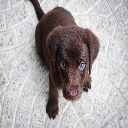

In [ ]:
im = Image.open(TEST_IMAGE).resize((128,128))
im

In [ ]:
#export
def test_fig_exists(ax):
    assert ax and len(np.frombuffer(ax.figure.canvas.tostring_argb(), dtype=np.uint8))

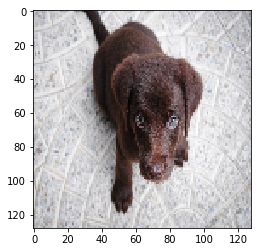

In [ ]:
fig,ax = plt.subplots()
ax.imshow(array(im));

In [ ]:
test_fig_exists(ax)

## Export -

In [ ]:
#hide
from local.notebook.export import notebook2script
notebook2script(all_fs=True)

Converted 00_test.ipynb.
Converted 01_core.ipynb.
Converted 02_data_pipeline.ipynb.
Converted 02_transforms.ipynb.
Converted 02a_pipeline.ipynb.
Converted 03_data_external.ipynb.
Converted 04_data_core.ipynb.
Converted 05_data_source.ipynb.
Converted 06_vision_core.ipynb.
Converted 07_pets_tutorial-meta.ipynb.
Converted 07_pets_tutorial.ipynb.
Converted 08_vision_augment.ipynb.
Converted 09_data_block.ipynb.
Converted 10_layers.ipynb.
Converted 11_optimizer.ipynb.
Converted 12_learner.ipynb.
Converted 13_callback_schedule.ipynb.
Converted 14_callback_hook.ipynb.
Converted 15_callback_progress.ipynb.
Converted 16_callback_tracker.ipynb.
Converted 17_callback_fp16.ipynb.
Converted 30_text_core.ipynb.
Converted 90_notebook_core.ipynb.
Converted 91_notebook_export.ipynb.
Converted 92_notebook_showdoc.ipynb.
Converted 93_notebook_export2html.ipynb.
Converted 94_index.ipynb.
Converted 95_synth_learner.ipynb.
